In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

%matplotlib widget

In [5]:
parts = pd.read_hdf("../config/ATPC_Bi_ion.h5", "MC/particles")
hits = pd.read_hdf("../config/ATPC_Bi_ion.h5", "MC/hits")

In [6]:
def GetElecronGammaPair(part_event, index):

    gamma_df     = part_event[part_event.particle_name == "gamma"]
    sorted_gamma = gamma_df.sort_values(by="kin_energy", ascending=False)
    prim_gamma   = pd.DataFrame([sorted_gamma.iloc[index]])
    electron     = part_event[part_event.mother_id == prim_gamma.particle_id.iloc[0]]

    if (len(electron) == 0):
        prim_gamma, electron = GetElecronGammaPair(part_event, int(index+1))
    
    return prim_gamma, electron
    


def GetTrueInfoBackground(parts, hits):

    lengths  = []
    energy = []
    creator_procs = []
    event_ids = []
    initial_x = []
    initial_y = []
    initial_z = []
    final_x = []
    final_y = []
    final_z = []
    energies = []
    prim_gamma_E=[]

    for eid in parts.event_id.unique():

        # print("\n\n On event:", eid)

        part_event = parts[parts.event_id == eid]

        # Get the particle ID of the Bi/Tl gamma
        prim_gamma, electron = GetElecronGammaPair(part_event, 0)

        if (len(prim_gamma)  == 0):
            prim_gamma = pd.DataFrame([part_event.loc[part_event[part_event.particle_name == "gamma"].kin_energy.idxmax()]])

        prim_gamma_E.append(prim_gamma.kin_energy.iloc[0])
        initial_x.append(round(prim_gamma.initial_x.iloc[0]))
        initial_y.append(round(prim_gamma.initial_y.iloc[0]))
        initial_z.append(round(prim_gamma.initial_z.iloc[0]))

        # Sometimes the primary gamma escapes
        if (len(electron)  == 0):
                continue

        creator_procs.append(electron.creator_proc.iloc[0])
        final_x.append(round(electron.initial_x.iloc[0])) # This is the position of where the gamma interacted first
        final_y.append(round(electron.initial_y.iloc[0]))
        final_z.append(round(electron.initial_z.iloc[0]))
        
        
        hits_event = hits[hits.event_id == eid]
        energies.append(hits_event.groupby('event_id')['energy'].sum().item())

        event_ids.append(eid)

    return pd.DataFrame({ "event_id": event_ids, "CreatorProc" :creator_procs, "energy": energies, "prim_gamma_E": prim_gamma_E, "initial_x": initial_x, "initial_y": initial_y, "initial_z": initial_z,  "final_x": final_x, "final_y": final_y, "final_z": final_z })

df = GetTrueInfoBackground(parts, hits)
display(df)

,event_id,CreatorProc,energy,prim_gamma_E,initial_x,initial_y,initial_z,final_x,final_y,final_z
0,9800,phot,2.447687,2.447687,-1061,-77,225,-998,262,465
1,9801,conv,2.542908,3.053907,-612,888,580,-579,821,621
2,9802,phot,2.447687,2.447687,-1054,107,290,-696,192,-257
3,9803,phot,2.404787,1.284497,-615,-881,505,486,-610,225
4,9804,phot,2.546693,0.768360,-147,-1047,-1008,64,-536,-1057
...,...,...,...,...,...,...,...,...,...,...
61,9861,phot,2.447687,2.447687,624,-855,268,563,-744,222
62,9862,phot,2.447687,2.447687,-881,-617,850,2,640,451
63,9863,phot,2.447687,2.447687,1081,-65,-848,386,63,111
64,9864,phot,2.447687,2.447687,362,425,-1069,-300,-257,683


In [7]:
df.describe()

,event_id,energy,prim_gamma_E,initial_x,initial_y,initial_z,final_x,final_y,final_z
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,9832.500000,2.440469,2.299467,-17.272727,5.530303,-57.090909,74.090909,-30.909091,-1.060606
std,19.196354,0.053478,0.418082,714.742892,639.297456,779.541872,528.760255,513.498041,565.591913
min,9800.000000,2.312571,0.768360,-1077.000000,-1079.000000,-1088.000000,-998.000000,-1053.000000,-1066.000000
25%,9816.250000,2.447687,2.315731,-663.000000,-595.750000,-880.250000,-322.500000,-471.250000,-475.250000
50%,9832.500000,2.447687,2.447687,17.500000,69.500000,46.000000,139.000000,6.500000,67.500000
75%,9848.750000,2.447687,2.447687,584.750000,516.250000,554.500000,499.000000,319.750000,464.250000
max,9865.000000,2.599377,3.053907,1081.000000,1033.000000,1088.000000,986.000000,1052.000000,1070.000000


[np.float32(0.7683605), np.float32(1.0700212), np.float32(1.2844969), np.float32(1.661272), np.float32(1.7645072), np.float32(1.8383775), np.float32(1.8731432), np.float32(2.0529835), np.float32(2.089433), np.float32(2.109943), np.float32(2.2040768), np.float32(2.2515612), np.float32(2.2876508), np.float32(2.3125706), np.float32(2.3252103), np.float32(2.3313403), np.float32(2.3695998), np.float32(2.447687), np.float32(2.7699208), np.float32(2.9218786), np.float32(2.9789078), np.float32(3.0539067)]


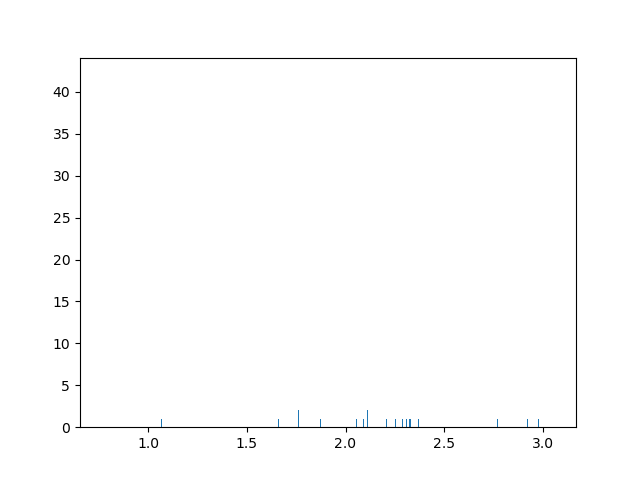

In [8]:
plt.figure()

plt.hist(df[df.energy >2.3].prim_gamma_E, bins = 500);

print(sorted(df[df.energy>2.3].prim_gamma_E.unique()))

In [9]:
# display(parts[parts.event_id == 9803])
display(parts[parts.mother_id == 6])

part_event = parts[ (parts.kin_energy == 2.447687)]
display(part_event)



,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
5,9800,44,e-,0,6,-997.757324,262.396393,464.686218,5.551624,-997.757324,...,0.002801,-0.004483,-0.002448,0.0,-0.0,0.0,0.000033,0.000054,phot,msc
6,9800,43,e-,0,6,-997.757324,262.396393,464.686218,5.551624,-997.757324,...,-0.003094,-0.003989,-0.002652,0.0,-0.0,-0.0,0.000032,0.000008,phot,msc
7,9800,42,e-,0,6,-997.757324,262.396393,464.686218,5.551624,-997.757324,...,0.001711,-0.002189,-0.003646,0.0,0.0,0.0,0.000021,0.000031,phot,msc
8,9800,41,e-,0,6,-997.757324,262.396393,464.686218,5.551624,-997.757324,...,0.002041,0.006346,-0.001304,0.0,0.0,-0.0,0.000045,0.000022,phot,msc
9,9800,40,e-,0,6,-997.757324,262.396393,464.686218,5.551624,-997.757385,...,-0.003978,0.002006,0.001079,-0.0,-0.0,0.0,0.000021,0.000049,phot,msc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,9865,11,e-,0,6,-804.786316,405.084259,195.412735,0.678208,-804.786316,...,-0.000573,0.001376,-0.005632,-0.0,0.0,-0.0,0.000033,0.000081,compt,eIoni
5084,9865,10,e-,0,6,-804.786316,405.084259,195.412735,0.678208,-804.786316,...,0.001711,0.005312,0.002228,-0.0,-0.0,0.0,0.000035,0.000004,compt,msc
5085,9865,9,e-,0,6,-804.786316,405.084259,195.412735,0.678208,-804.786255,...,0.009010,-0.021626,-0.002305,0.0,-0.0,-0.0,0.000542,0.000548,compt,eIoni
5086,9865,8,e-,0,6,-804.786316,405.084259,195.412735,0.678208,-804.786316,...,-0.003488,-0.004338,-0.003253,-0.0,-0.0,0.0,0.000041,0.000007,compt,msc


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
4,9800,6,gamma,0,2,-1060.768677,-76.542130,224.962128,0.000387,-997.757324,...,1.752147,1.508268,0.803916,0.0,0.0,-0.0,2.447687,1664.218872,RadioactiveDecay,phot
168,9802,6,gamma,0,2,-1054.410156,106.929482,289.896088,0.000281,-695.576416,...,1.718735,1.434321,-0.989870,-0.0,0.0,-0.0,2.447687,1179.880249,RadioactiveDecay,phot
437,9805,6,gamma,0,2,1013.761230,366.046997,571.051697,0.002180,707.619263,...,-1.715436,-0.002310,-1.745980,0.0,0.0,-0.0,2.447687,2023.372192,RadioactiveDecay,phot
681,9808,6,gamma,0,2,-510.877686,-273.612610,-1085.912354,0.000262,-360.400970,...,1.740218,1.179130,1.253980,-0.0,-0.0,0.0,2.447687,2077.875732,RadioactiveDecay,phot
758,9809,6,gamma,0,2,451.527100,-988.957947,711.644348,0.000119,443.511505,...,-0.144037,2.415281,0.369922,-0.0,-0.0,0.0,2.447687,694.999329,RadioactiveDecay,phot
809,9810,6,gamma,0,2,-433.385651,1005.718689,400.963654,0.000483,-324.293427,...,0.140916,-1.760491,-1.694693,0.0,0.0,0.0,2.447687,2145.194580,RadioactiveDecay,phot
978,9812,6,gamma,0,2,192.516861,417.779114,1084.786865,0.004052,592.495605,...,0.554819,-0.722629,-2.271818,-0.0,0.0,-0.0,2.447687,1702.968384,RadioactiveDecay,phot
1251,9815,6,gamma,0,2,-605.313538,-544.023865,-1062.854858,0.000961,-598.384399,...,0.442737,0.121134,2.404263,-0.0,-0.0,-0.0,2.447687,960.665649,RadioactiveDecay,phot
1361,9817,6,gamma,0,2,665.371643,826.160950,-339.183594,0.001839,222.086182,...,-1.645645,-0.021427,1.811785,-0.0,-0.0,0.0,2.447687,1074.373657,RadioactiveDecay,phot
1402,9818,6,gamma,0,2,-278.075531,463.420593,1066.869507,0.000210,-881.442871,...,-1.832468,-0.999360,-1.278481,-0.0,-0.0,0.0,2.447687,806.993835,RadioactiveDecay,phot
